# PRACTICA GUIADA: Nociones de Estadística Inferencial

## Introducción

La idea de esta práctica es 
Observemos la distribución de los [Klout Scores](https://klout.com/corp/score) que se adjunta en el archivo `klouts_scores.csv`.

Imagine que tomamos como población las 1048 observaciones de Klout scores con las que contamos. 


## 1. Aproximando una distribución muestral de medias

### Consignas

1. Obtenemos una muestra de tamaño 5 y tomamos el promedio. Repetimos este paso 1000 veces para poder hacer un histograma de las medias. 
2. Obtenemos una muestra de tamaño  10 y tomamos el promedio. Repetimos este paso 1000 veces.
3. Obtenemos una muestra de tamaño 100 y tomamos el promedio. Repetimos este paso 1000 veces.
4. ¿Qué observa sobre el histograma de la media a medida que vamos aumentando el tamaño muestral?
5. ¿Qué observa acerca del valor de las medias de las diferentes distribuciones muestrales en relación a la media poblacional?
6. ¿Qué sucede con la variabilidad de la distribución muestral?

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/klout_scores.csv', header=None, decimal=",")
df.columns = ['k_score']

In [3]:
df.head()

,k_score
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


In [4]:
df.describe()

,k_score
count,1048.000000
mean,37.719055
std,16.044315
min,10.000000
25%,23.174620
50%,41.094683
75%,50.284432
max,87.247529


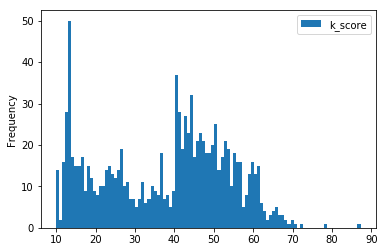

In [5]:
df.plot(kind='hist', bins=100)

Definimos una función para hacer el sampling y calcular la media para una muestra de tamamaño n.

In [6]:
def sampling(df, n, r = False):
    index = np.random.choice(range(0,len(df)), size = n, replace = r)
    df_s = np.array(df.iloc[index,:])
    return(df_s)

def samp_mean(df, n_i):
    means = []
    for reps in range(0,1000):
        s_ = sampling(df, n_i, r = False)
        m_ = s_.mean()
        means.append(m_)
    return(means)

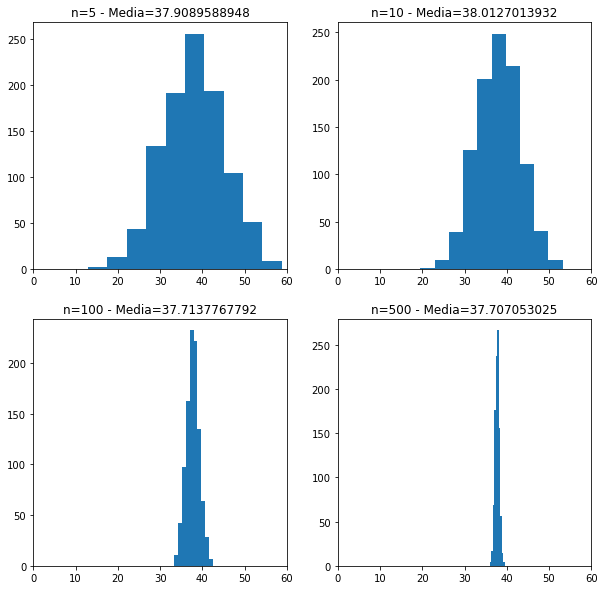

In [7]:
m = []
n_s = [5,10,100,500]
plt.figure(figsize=(10,10))
for i in range(len(n_s)):
    mm = samp_mean(df, n_s[i])    
    plt.subplot(('22' + str(i+1)))
    plt.hist(mm)
    plt.xlim((0,60))
    plt.title('n=' + str(n_s[i]) + ' - ' + 'Media=' + str(np.mean(mm)))

## 2. Calculando un intervalo de confianza con `scipy`

### Consignas

1. Ahora, extraiga una muestra de la población de tamaño n=200. 
2. A continuación, calcule un intervalo de confianza del 95% para la media poblacional

In [8]:
#Extraemos la muestra 

sample = sampling(df,200)

In [9]:
# Calculamos los estadísticos para utilizar

mean, sigma, n = np.mean(sample), np.std(sample), len(sample)

# Calculamos el intervalo de confianza de una aproximación normal con el método de scipy

st.norm.interval(0.95, loc=mean, scale=sigma/np.sqrt(n))

(34.062135879307661, 38.536898449551344)

In [10]:
# Podemos calcularlo a mano... en base a la fórmula vista en las slides

mean - 1.96*sigma/np.sqrt(n), mean + 1.96*sigma/np.sqrt(n)

(34.062094766146046, 38.536939562712959)

In [11]:
# Poodemos calcular una aproximación t de Student

st.t.interval(0.95, n,  loc=mean, scale=sigma/(np.sqrt(n)-1))

(33.877233399112669, 38.721800929746337)

## 3. Haciendo una prueba de hipótesis en `scipy`

### Consignas

1. Ahora suponga que existe en una consultoría se plantea que la media del Klout Score poblacional es de 38.   Realice una prueba de hipótesis al respecto con un nivel de significación de 0.05. Plantee las hipótesis nula y alternativa. ¿A qué conclusión llega?
2. Suponga que en lugar de definir un nivel de significación de 0.05, se define uno de 0.1. ¿Podría haber cambiado el resultado?
3. ¿Y si la hipótesis nula fuera que la media es 42?

Ho) Mu = 38
Ha) Mu <> 38

In [12]:
np.mean(sample)

36.299517164429503

In [13]:
st.ttest_1samp(sample,38)

Ttest_1sampResult(statistic=array([-1.48590787]), pvalue=array([ 0.138886]))

In [14]:
st.ttest_1samp(sample,42)

Ttest_1sampResult(statistic=array([-4.98116895]), pvalue=array([  1.36827683e-06]))